In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GaussianNoise
%matplotlib inline

In [71]:
#define data generator
min_x = -1
max_x = 1
mu=0.0 # mean of the Gaussian distribution
stdv=0.2 # standard deviation

def data_generator(size):
    X = np.linspace(-1,1,size, endpoint=True)
    GAUSSIAN_NOISE = np.random.normal(mu, stdv, size)
    Y = X + GAUSSIAN_NOISE
    return X, Y

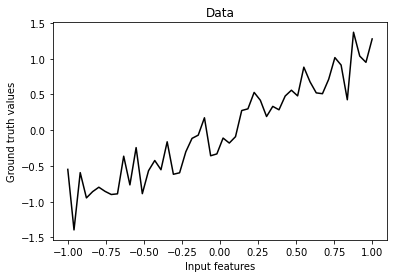

In [72]:
#Use different data size for both training dataset and testing dataset
x_train, y_train = data_generator(50)
plt.plot(x_train,y_train, color='black')
plt.title('Data', color ='black')
plt.xlabel('Input features', color = 'black')
plt.ylabel('Ground truth values', color = 'black')
plt.show() 

In [73]:
x_train = tf.reshape(x_train,[1,-1])

In [74]:
y_train = tf.reshape(y_train,[1,-1])
y_train.shape

TensorShape([1, 50])

In [75]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np

def custom_loss():
    def conditional_loss(y_true, y_pred):
        loss = tf.keras.losses.mean_squared_error(y_pred, y_true)
#         loss = tf.where(tf.greater(y_pred,0),loss  * y_pred, loss)
        return loss
    return conditional_loss

loss = custom_loss()

n_outputs = y_train.shape[1]

model = Sequential([
    tf.keras.layers.Input(shape = (n_outputs,)),
    tf.keras.layers.Dense(2, activation = tf.nn.relu),
    tf.keras.layers.Dense(n_outputs)
])

opt = RMSprop(0.001)

model.compile(
    loss=loss,
    optimizer=opt,
    metrics=['mae']
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 102       
_________________________________________________________________
dense_15 (Dense)             (None, 50)                150       
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(x_train, y_train, epochs=100)

Train on 1 samples
Epoch 1/100
1/1 [==============================] - 1s 581ms/sample - loss: 0.4436 - mae: 0.5765
Epoch 2/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.4399 - mae: 0.5733
Epoch 3/100
1/1 [==============================] - 0s 2ms/sample - loss: 0.4373 - mae: 0.5710
Epoch 4/100
1/1 [==============================] - 0s 2ms/sample - loss: 0.4351 - mae: 0.5691
Epoch 5/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.4332 - mae: 0.5674
Epoch 6/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.4314 - mae: 0.5659
Epoch 7/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.4298 - mae: 0.5644
Epoch 8/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.4282 - mae: 0.5631
Epoch 9/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.4268 - mae: 0.5618
Epoch 10/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.4253 - mae: 0.5605
Epoch 11/100
1/1 [====================

1/1 [==============================] - 0s 4ms/sample - loss: 0.3440 - mae: 0.4842
Epoch 88/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.3431 - mae: 0.4833
Epoch 89/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.3421 - mae: 0.4824
Epoch 90/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.3412 - mae: 0.4814
Epoch 91/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.3403 - mae: 0.4805
Epoch 92/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.3393 - mae: 0.4795
Epoch 93/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.3384 - mae: 0.4786
Epoch 94/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.3374 - mae: 0.4777
Epoch 95/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.3365 - mae: 0.4767
Epoch 96/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.3356 - mae: 0.4758
Epoch 97/100
1/1 [==============================] - 0s 3ms/samp

In [84]:
pred = model.predict(x_train)
pred = tf.reshape(pred,[1,-1])
pred.shape

TensorShape([1, 50])

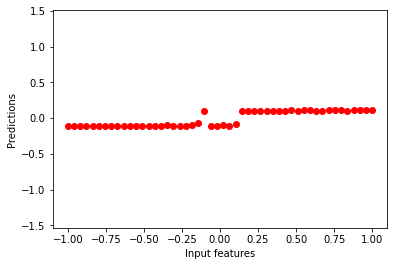

In [83]:
plt.scatter(x_train, model.predict(x_train), color = 'red')
plt.plot(x_train, y_train, color = 'green')
plt.xlabel('Input features', color = 'black')
plt.ylabel('Predictions', color = 'black')
plt.show()